https://www.youtube.com/watch?v=GotYQ_wvJQI

In [8]:
import pandas as pd
import numpy as np
from sklearn import *
from collections import Counter
import nltk
import string
import re
from nltk import *
from sklearn.preprocessing import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [9]:
df = pd.read_csv('train.csv', encoding='ISO-8859-1')
df

,Id,Hotel_name,Review_Title,Review_Text,Rating
0,0,Park Hyatt,Refuge in Chennai,Excellent room and exercise facility. All arou...,80.0
1,1,Hilton Chennai,Hilton Chennai,Very comfortable and felt safe. \r\nStaff were...,100.0
2,2,The Royal Regency,No worth the rating shown in websites. Pricing...,Not worth the rating shown. Service is not goo...,71.0
3,3,Rivera,Good stay,"First of all nice & courteous staff, only one ...",86.0
4,4,Park Hyatt,Needs improvement,Overall ambience of the hotel is very good. In...,86.0
...,...,...,...,...,...
2346,2346,Hyatt Regency Chennai,NaN,Most impressive service by staff in all areas....,80.0
2347,2347,New Woodlands,Homely villa,New woodlands chennai which gave me a homely e...,71.0
2348,2348,Samudra Residency,Nice accommodation and facilities,Awesome I liked the neatness and maintenance. ...,100.0
2349,2349,The Residency Chennai,The Residency Good Centrally located Hotel,The overall experience was good. However the w...,80.0


In [10]:
df.columns = df.columns.str.lower()
df

,id,hotel_name,review_title,review_text,rating
0,0,Park Hyatt,Refuge in Chennai,Excellent room and exercise facility. All arou...,80.0
1,1,Hilton Chennai,Hilton Chennai,Very comfortable and felt safe. \r\nStaff were...,100.0
2,2,The Royal Regency,No worth the rating shown in websites. Pricing...,Not worth the rating shown. Service is not goo...,71.0
3,3,Rivera,Good stay,"First of all nice & courteous staff, only one ...",86.0
4,4,Park Hyatt,Needs improvement,Overall ambience of the hotel is very good. In...,86.0
...,...,...,...,...,...
2346,2346,Hyatt Regency Chennai,NaN,Most impressive service by staff in all areas....,80.0
2347,2347,New Woodlands,Homely villa,New woodlands chennai which gave me a homely e...,71.0
2348,2348,Samudra Residency,Nice accommodation and facilities,Awesome I liked the neatness and maintenance. ...,100.0
2349,2349,The Residency Chennai,The Residency Good Centrally located Hotel,The overall experience was good. However the w...,80.0


In [11]:
df.set_index('id', inplace=True)
df

,hotel_name,review_title,review_text,rating
id,,,,
0,Park Hyatt,Refuge in Chennai,Excellent room and exercise facility. All arou...,80.0
1,Hilton Chennai,Hilton Chennai,Very comfortable and felt safe. \r\nStaff were...,100.0
2,The Royal Regency,No worth the rating shown in websites. Pricing...,Not worth the rating shown. Service is not goo...,71.0
3,Rivera,Good stay,"First of all nice & courteous staff, only one ...",86.0
4,Park Hyatt,Needs improvement,Overall ambience of the hotel is very good. In...,86.0
...,...,...,...,...
2346,Hyatt Regency Chennai,NaN,Most impressive service by staff in all areas....,80.0
2347,New Woodlands,Homely villa,New woodlands chennai which gave me a homely e...,71.0
2348,Samudra Residency,Nice accommodation and facilities,Awesome I liked the neatness and maintenance. ...,100.0


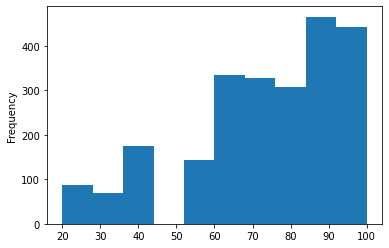

In [12]:
df['rating'].plot(kind='hist')

In [13]:
features = ['hotel_name', 'review_title', 'review_text']
df[features] = df[features].apply(lambda x: x.str.lower())
df

,hotel_name,review_title,review_text,rating
id,,,,
0,park hyatt,refuge in chennai,excellent room and exercise facility. all arou...,80.0
1,hilton chennai,hilton chennai,very comfortable and felt safe. \r\nstaff were...,100.0
2,the royal regency,no worth the rating shown in websites. pricing...,not worth the rating shown. service is not goo...,71.0
3,rivera,good stay,"first of all nice & courteous staff, only one ...",86.0
4,park hyatt,needs improvement,overall ambience of the hotel is very good. in...,86.0
...,...,...,...,...
2346,hyatt regency chennai,NaN,most impressive service by staff in all areas....,80.0
2347,new woodlands,homely villa,new woodlands chennai which gave me a homely e...,71.0
2348,samudra residency,nice accommodation and facilities,awesome i liked the neatness and maintenance. ...,100.0


In [14]:
df[features] = df[features].apply(lambda x: x.str.replace('[\W]+', ' '))
df

,hotel_name,review_title,review_text,rating
id,,,,
0,park hyatt,refuge in chennai,excellent room and exercise facility all aroun...,80.0
1,hilton chennai,hilton chennai,very comfortable and felt safe staff were very...,100.0
2,the royal regency,no worth the rating shown in websites pricing ...,not worth the rating shown service is not good...,71.0
3,rivera,good stay,first of all nice courteous staff only one con...,86.0
4,park hyatt,needs improvement,overall ambience of the hotel is very good in ...,86.0
...,...,...,...,...
2346,hyatt regency chennai,NaN,most impressive service by staff in all areas ...,80.0
2347,new woodlands,homely villa,new woodlands chennai which gave me a homely e...,71.0
2348,samudra residency,nice accommodation and facilities,awesome i liked the neatness and maintenance f...,100.0


In [15]:
display(df.isna().sum())
df = df.fillna('')
display(df.isna().sum())

hotel_name        0
review_title    215
review_text       0
rating            0
dtype: int64

hotel_name      0
review_title    0
review_text     0
rating          0
dtype: int64

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/denis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
sw_eng = set(stopwords.words('english'))
len(sw_eng)

179

In [18]:
df[features] = df[features].apply(lambda x: x.apply(lambda y: ' '.join([word for word in y.split(' ') if not(word in sw_eng)])))
df[features]

,hotel_name,review_title,review_text
id,,,
0,park hyatt,refuge chennai,excellent room exercise facility around atmosp...
1,hilton chennai,hilton chennai,comfortable felt safe staff helpful respectful...
2,royal regency,worth rating shown websites pricing ok,worth rating shown service good room well main...
3,rivera,good stay,first nice courteous staff one con stay time c...
4,park hyatt,needs improvement,overall ambience hotel good room facilities ne...
...,...,...,...
2346,hyatt regency chennai,,impressive service staff areas good restaurant...
2347,new woodlands,homely villa,new woodlands chennai gave homely experience l...
2348,samudra residency,nice accommodation facilities,awesome liked neatness maintenance facilities ...


In [19]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /Users/denis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/denis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
def get_wordnet_pos(treebank_tag):
    my_switch = {
        'J': wordnet.wordnet.ADJ,
        'V': wordnet.wordnet.VERB,
        'N': wordnet.wordnet.NOUN,
        'R': wordnet.wordnet.ADV,
    }
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
            return item
    return wordnet.wordnet.NOUN

def my_lemmatizer(sent):
    lemmatizer = WordNetLemmatizer()
    tokenized_sent = sent.split()
    pos_tagged = [(word, get_wordnet_pos(tag))
                 for word, tag in pos_tag(tokenized_sent)]
    return ' '.join([lemmatizer.lemmatize(word, tag)
                    for word, tag in pos_tagged])

In [21]:
my_lemmatizer('gone')

'go'

In [22]:
df[features] = df[features].apply(lambda x: x.apply(lambda y: ' '.join([my_lemmatizer(word) for word in y.split(' ')])))
df

,hotel_name,review_title,review_text,rating
id,,,,
0,park hyatt,refuge chennai,excellent room exercise facility around atmosp...,80.0
1,hilton chennai,hilton chennai,comfortable felt safe staff helpful respectful...,100.0
2,royal regency,worth rating show website pricing ok,worth rating show service good room well maint...,71.0
3,rivera,good stay,first nice courteous staff one con stay time c...,86.0
4,park hyatt,need improvement,overall ambience hotel good room facility need...,86.0
...,...,...,...,...
2346,hyatt regency chennai,,impressive service staff area good restaurant ...,80.0
2347,new woodland,homely villa,new woodland chennai give homely experience lu...,71.0
2348,samudra residency,nice accommodation facility,awesome like neatness maintenance facility rea...,100.0


In [23]:
all_text_series = df.hotel_name + df.review_title + df.review_text
all_text_series

id
0       park hyattrefuge chennaiexcellent room exercis...
1       hilton chennaihilton chennaicomfortable felt s...
2       royal regencyworth rating show website pricing...
3       riveragood stayfirst nice courteous staff one ...
4       park hyattneed improvementoverall ambience hot...
                              ...                        
2346    hyatt regency chennaiimpressive service staff ...
2347    new woodlandhomely villanew woodland chennai g...
2348    samudra residencynice accommodation facilityaw...
2349    residency chennairesidency good centrally loca...
2350    cloud nine service apartmenthomely stay comfor...
Length: 2351, dtype: object

In [24]:
count_vect = CountVectorizer()
count_vect.fit(all_text_series)
len(count_vect.get_feature_names())

5971

In [25]:
temp = count_vect.transform(all_text_series)
X = temp.todense()
y = df.rating
display(X)
display(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
svm = SGDRegressor()
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)
display(predicted.shape)

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

id
0        80.0
1       100.0
2        71.0
3        86.0
4        86.0
        ...  
2346     80.0
2347     71.0
2348    100.0
2349     80.0
2350     71.0
Name: rating, Length: 2351, dtype: float64

(353,)

In [26]:
display('Mean squared error: ')
display(mean_squared_error(y_test, predicted))
display('R2 error: ')
display(r2_score(y_test, predicted))

'Mean squared error: '

238.02479118320093

'R2 error: '

0.46459055093669144

** Неплохо! Попробуем Tf Idf ** 

In [27]:
tfidf = TfidfVectorizer()
tfidf.fit(all_text_series)
temp = count_vect.transform(all_text_series).todense()
X = temp
y = df.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
svm = SGDRegressor()
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)
display('Mean squared error: ')
display(mean_squared_error(y_test, predicted))
display('R2 error: ')
display(r2_score(y_test, predicted))


'Mean squared error: '

233.38320703361256

'R2 error: '

0.4335782278163506

** Немного лучше! Теперь попробуем другие модели **

In [28]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train, y_train)
predicted = rfr.predict(X_test)
display('Mean squared error: ')
display(mean_squared_error(y_test, predicted))
display('R2 error: ')
display(r2_score(y_test, predicted))

'Mean squared error: '

198.80726543909353

'R2 error: '

0.5174941460257751

** Хороший результат! Попробуем теперь catboost **

In [29]:
cbr = CatBoostRegressor()
kek = pd.DataFrame(X_train)
kek2 = pd.DataFrame(X_test)
display(kek)
cbr.fit(kek, y_train)
predicted = cbr.predict(kek2)
display('Mean squared error: ')
display(mean_squared_error(y_test, predicted))
display('R2 error: ')
display(r2_score(y_test, predicted))

,0,1,2,3,4,5,6,7,8,9,...,5961,5962,5963,5964,5965,5966,5967,5968,5969,5970
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


n: 12.1818171	total: 6.47s	remaining: 3.93s
622:	learn: 12.1793511	total: 6.48s	remaining: 3.92s
623:	learn: 12.1697192	total: 6.49s	remaining: 3.91s
624:	learn: 12.1653647	total: 6.5s	remaining: 3.9s
625:	learn: 12.1575821	total: 6.51s	remaining: 3.89s
626:	learn: 12.1477685	total: 6.52s	remaining: 3.88s
627:	learn: 12.1445793	total: 6.53s	remaining: 3.87s
628:	learn: 12.1421192	total: 6.54s	remaining: 3.86s
629:	learn: 12.1299251	total: 6.55s	remaining: 3.85s
630:	learn: 12.1274768	total: 6.57s	remaining: 3.84s
631:	learn: 12.1199778	total: 6.58s	remaining: 3.83s
632:	learn: 12.1156376	total: 6.59s	remaining: 3.82s
633:	learn: 12.1131950	total: 6.6s	remaining: 3.81s
634:	learn: 12.1094444	total: 6.61s	remaining: 3.8s
635:	learn: 12.0973663	total: 6.62s	remaining: 3.79s
636:	learn: 12.0950340	total: 6.63s	remaining: 3.78s
637:	learn: 12.0913183	total: 6.64s	remaining: 3.77s
638:	learn: 12.0822334	total: 6.65s	remaining: 3.75s
639:	learn: 12.0798122	total: 6.66s	remaining: 3.74s
640:	l

'Mean squared error: '

213.16813012946693

'R2 error: '

0.4826402825820383

** Лучшим оказался RandomForestClassifier с tf idf **

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from preprocessing import preprocess
X = preprocess('train.csv')
display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train, y_train)
predicted = rfr.predict(X_test)
display('Mean squared error: ')
display(mean_squared_error(y_test, predicted))
display('R2 error: ')
display(r2_score(y_test, predicted))

['positive-words.txt', 'sample submission.csv', 'words_from_train.pickle', 'SentiWordNet.txt', 'test.csv', '__pycache__', 'preprocessing.py', 'solve.ipynb', 'train.csv', 'negative-words.txt', 'catboost_info']
                          hotel_name                            review_title  \
id                                                                             
0                         park hyatt                          refuge chennai   
1                     hilton chennai                          hilton chennai   
2                      royal regency  worth rating shown websites pricing ok   
3                             rivera                               good stay   
4                         park hyatt                       needs improvement   
...                              ...                                     ...   
2346           hyatt regency chennai                                           
2347                   new woodlands                            homely 

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

'Mean squared error: '

227.38890254957508

'R2 error: '

0.47900385160933123

In [35]:
rfr = RandomForestRegressor(n_jobs=-1)
X_train, y_train, X_test = preprocess(path_train='train.csv', path_test='test.csv')
rfr.fit(X_train, y_train)
y_test = rfr.predict(X_test)
display(y_test)

['positive-words.txt', 'sample submission.csv', 'words_from_train.pickle', 'SentiWordNet.txt', 'test.csv', '__pycache__', 'preprocessing.py', 'solve.ipynb', 'train.csv', 'negative-words.txt', 'catboost_info']
[nltk_data] Downloading package stopwords to /Users/denis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/denis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/denis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


array([91.58, 69.64, 75.42, ..., 45.09, 47.81, 79.45])

In [39]:
y_test = np.round(y_test).astype(int)

In [45]:
temp_test = pd.read_csv('test.csv', encoding='ISO-8859-1')
my_submission = pd.DataFrame(y_test, index=temp_test['Id'], columns=['Rating'])
display(my_submission)
my_submission.to_csv('my_submission.csv')

,Rating
Id,
2351,92
2352,70
2353,75
2354,51
2355,73
...,...
4698,86
4699,74
4700,45
